In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report



import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/akash/Downloads/winequality-red.csv')

In [3]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- Here we have 12 columns and 1599 rows in the dataset.Here we have to check the quality of wine.This is a multiclass classification problem.Therefore, 'quality' is our target variable from dataset.

In [5]:
df.sample(n=10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
10              6.7             0.580         0.08             1.8      0.097   
1557            6.6             0.855         0.02             2.4      0.062   
886             9.0             0.800         0.12             2.4      0.083   
1275            8.0             0.715         0.22             2.3      0.075   
704             9.1             0.765         0.04             1.6      0.078   
556            10.9             0.530         0.49             4.6      0.118   
912            10.0             0.460         0.44             2.9      0.065   
671             8.2             0.730         0.21             1.7      0.074   
628             8.7             0.540         0.26             2.5      0.097   
1482            7.2             0.580         0.54             2.1      0.114   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
10                   15.0                  65.0  0.99590  3.28       0.54   
1557                 15.0                  23.0  0.99627  3.54       0.60   
886                   8.0                  28.0  0.99836  3.33       0.65   
1275                 13.0                  81.0  0.99688  3.24       0.54   
704                   4.0                  14.0  0.99800  3.29       0.54   
556                  10.0                  17.0  1.00020  3.07       0.56   
912                   4.0                   8.0  0.99674  3.33       0.62   
671                   5.0                  13.0  0.99680  3.20       0.52   
628                   7.0                  31.0  0.99760  3.27       0.60   
1482                  3.0                   9.0  0.99719  3.33       0.57   

      alcohol  quality  
10        9.2        5  
1557     11.0        6  
886      10.4        6  
1275      9.5        6  
704       9.7        4  
556      11.7        6  
912      12.2        6  
671       9.5        5  
628       9.3        6  
1482     10.3        4

- Here we observe the 10 ramdom sample from dataset.

# Non Graphical Analysis

In [6]:
# Fetch the first five information from dataset
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
# Fetch last five information from dataset
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [8]:
# Here we check the size of the dataset
df.shape

(1599, 12)

In [9]:
# Here we check the column name in our dataset
list_of_col = df.columns
print(list_of_col.to_list())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [10]:
# Here we check the datatypes in our dataset 
datatypes = df.dtypes
print(datatypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


- We observe that all columns except target column  has 'float64' datatypes and taget column has omly 'int64' datatypes.

In [11]:
distict_values = df.nunique()
print(distict_values.to_frame('no. of unique values'))

                      no. of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6


In [12]:
# Check missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- We see that, there are no null or no missing value present in our dataset. 

In [13]:
# Check Duplicates
duplicates = df.duplicated().sum()
print(duplicates)

240


- We observe that, 240 duplicate values are present in our dataset.So, we drop the duplicates.

In [14]:
# Check which row has duplicate value
df.loc[df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

- From above dataframe we observe which row have duplicate value.

In [15]:
remove_duplicate = df.drop_duplicates(inplace=True)
print(remove_duplicate)

None


In [16]:
# Again we have check duplicate value is present or not after removing duplicates
print(df.duplicated().sum())

0


- Therefore there are no duplicate value is present right now in our dataset.

In [17]:
# Check again the shape after drop duplicates
df.shape

(1359, 12)

After removing duplicate values there are 1359 rows in our dataset

In [18]:
df.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.171231          0.578596     0.244523        2.509532   
6             8.337383          0.496084     0.279364        2.457290   
7             8.858683          0.403653     0.371856        2.716766   
8             8.441176          0.427647     0.382941        2.576471   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.093971            17.161179             57.406412  0.997082   
6         0.085075            15.637383             40.816822  0.996565   
7         0.076832            13.994012             35.449102  0.996051   
8         0.068353            13.764706             34.470588  0.995095   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.300815   0.623570   9.888562  
6        3.318000   0.674542  10.658879  
7        3.290060   0.742635  11.491118  
8        3.274118   0.774706  12.158824

we observe,

- where volatile acidity,chlorides are in high amounts then there wine quality is BAD.

- where citric acid and sulphates are in high amounts then there wine quality is GOOD.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


From above information, we observe that 11 columns have 'float64' datatypes and only target column has 'int64' datatypes.Memory usage is about 138.0 KB.

In [20]:
# Statistical summery of numerical data of features
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

From statistical information we observe that,

- The count value of all feature columns and a target column has same.There are no negative value,therefore our dataset is proper.

- Here Mean value is greater than Median value in  all columns except 'density' and 'pH' columns which means that the data is positive skewed(right skewed).

- Here Mean value is less than Median value in 'pH' column which means that the data is negative skewed(left skewed).

- Here Mean and Median value is almost same in 'density' column which means the data is symmetric(no skewness).

- In 75% and max values have huge difference in 'total sulfur dioxide','free sulfur dioxide','fixed acidity','residual sugar' therefore may have some outliers.

# Graphical Analysis

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

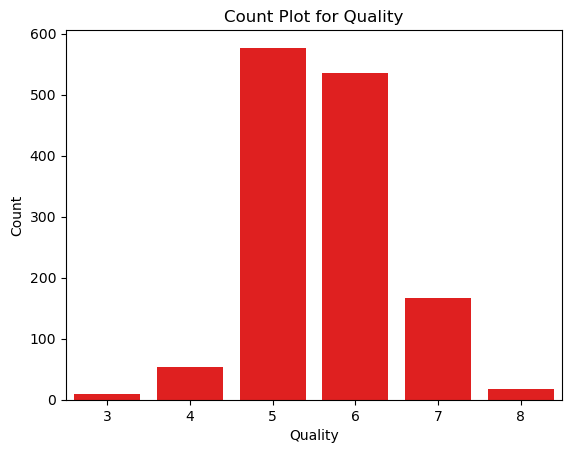

In [21]:
sns.countplot(x = 'quality', data=df, color='r')
plt.title('Count Plot for Quality')
plt.xlabel('Quality')
plt.ylabel('Count')


df.quality.value_counts()

- By observe the plot, This indicates that the majority of wine falls into the middle-range quality categories (5 and 6)while the good categories (3, 4, 7, and 8) have fewer samples..Therefore our dataset is imbalanced.We will rectify it later.

0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64

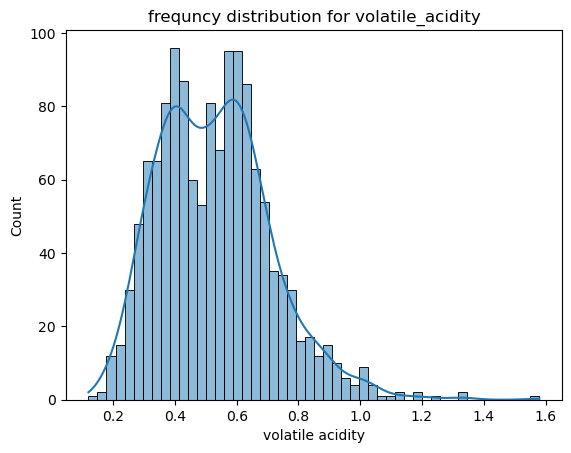

In [22]:
sns.histplot(x = 'volatile acidity', data=df, palette='viridis', kde=True, bins=50)
plt.title('frequncy distribution for volatile_acidity')
plt.xlabel('volatile acidity')
plt.ylabel('Count')

df['volatile acidity'].value_counts()

In [23]:
print(df['volatile acidity'].max())
print(df['volatile acidity'].min())

1.58
0.12


- By observe the plot,the data is skewed to right.

- Here this data is range between 0.12 to 1.58

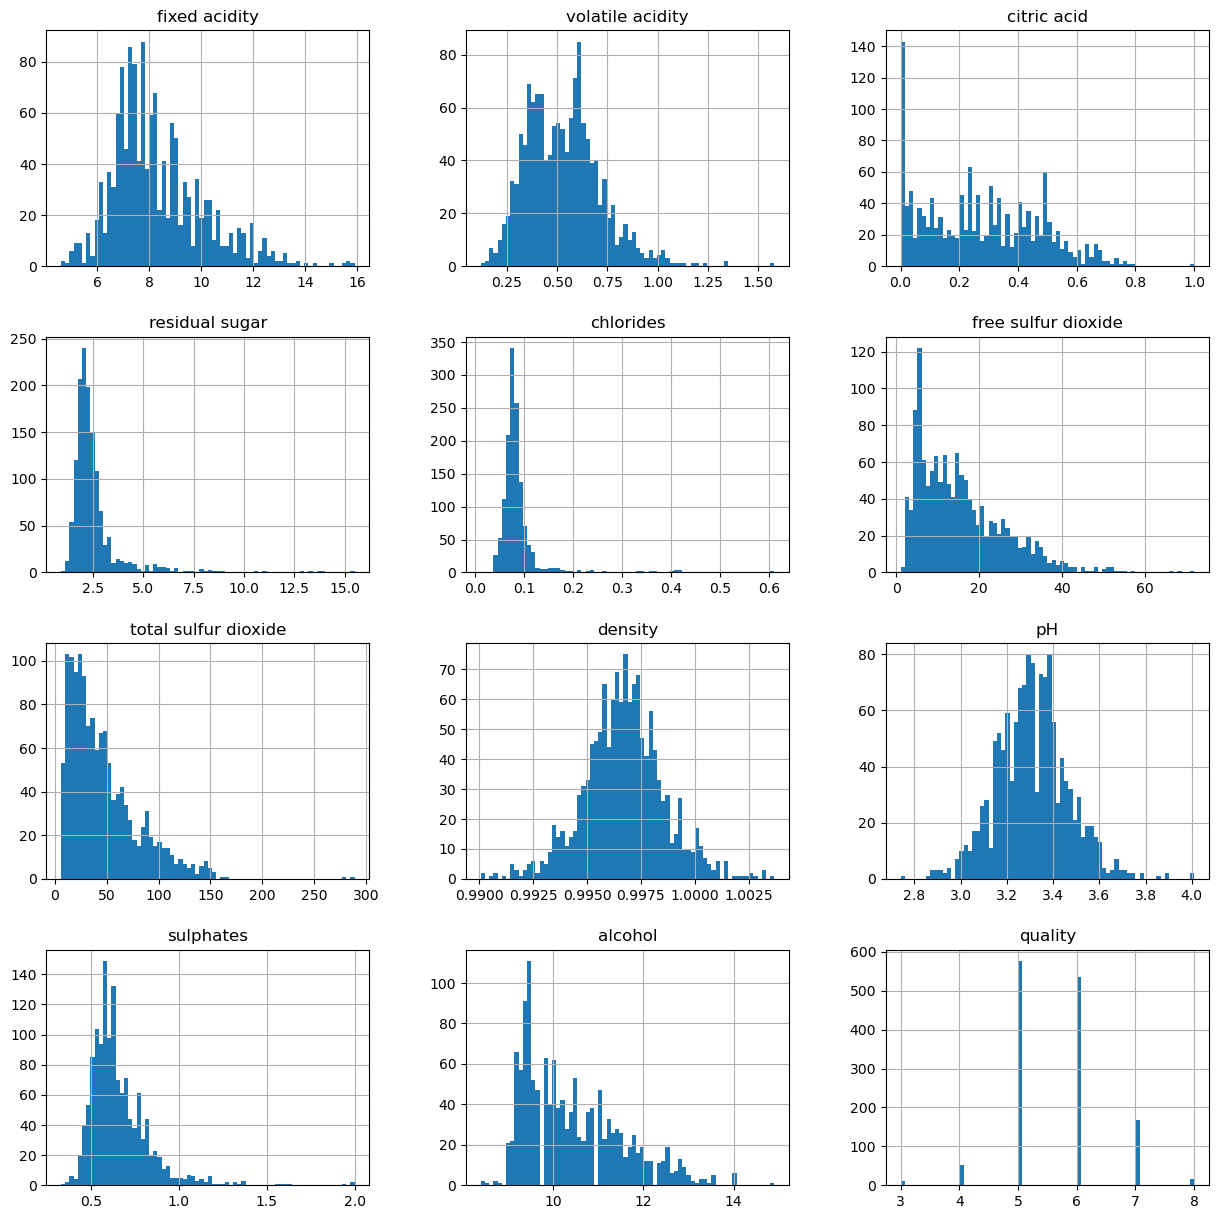

In [24]:
df.hist(bins=70,figsize=(15,15))
plt.show()

- By observe the plot, some of data columns have positive skewness.

- Here we observe pH and density column are almost normally distributed.

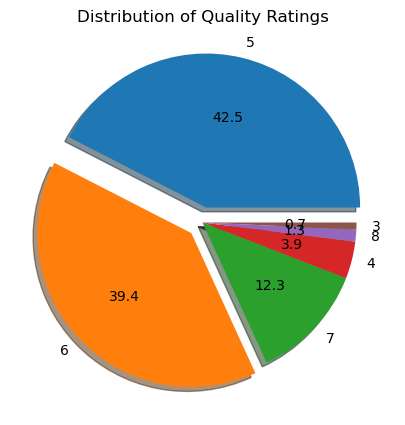

In [25]:
plt.figure(figsize=(10,5))
df['quality'].value_counts().plot(kind='pie',autopct="%1.1f",explode = (.1, .1, .0, 0,0,0),shadow=True)
plt.ylabel('')
plt.title('Distribution of Quality Ratings')
plt.show()

- By observing the pie chart,the quality rating 5 and 6 most common in our dataset 42.5% and 39.4%.

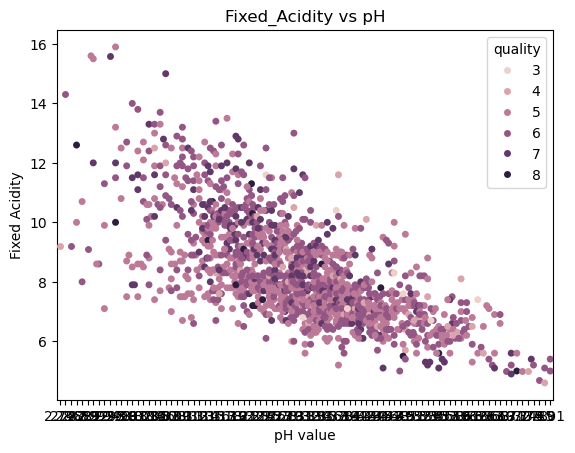

In [26]:
sns.swarmplot(x = 'pH', y='fixed acidity', data=df, hue='quality')
plt.title('Fixed_Acidity vs pH')
plt.xlabel('pH value')
plt.ylabel('Fixed Acidity')
plt.show()

- The plot shows that a negative correlation which means that when pH value is increased the fixed acidity value is  decreased.

Text(0.5, 1.0, 'Fixed_Acidity vs Citric_Acid')

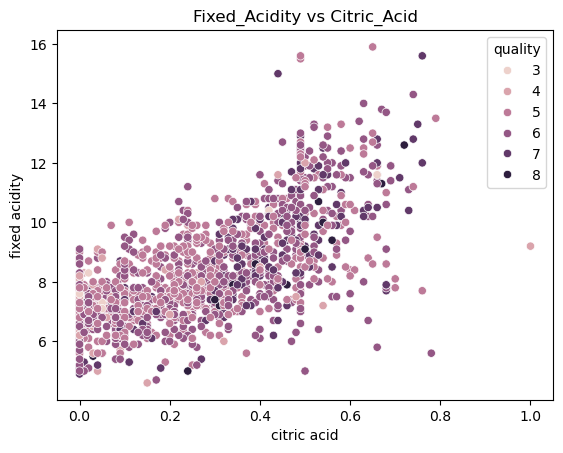

In [27]:
sns.scatterplot(x = 'citric acid', y='fixed acidity', data=df, hue='quality')
plt.title('Fixed_Acidity vs Citric_Acid')

- By obseving the plot,it indicates a clear upward trends in the datapoints between fixed acidity and citric acid.whether there is a linear relationship between fixed acidity and citric acid.

- Depending on the distribution of points there is a positive relationship which means that,citric acid increases, fixed acidity tends to increase.

- There are outliers shows in distrinution of datapoints.

Text(0.5, 1.0, 'Relation between volatile acidity vs fixed acidity')

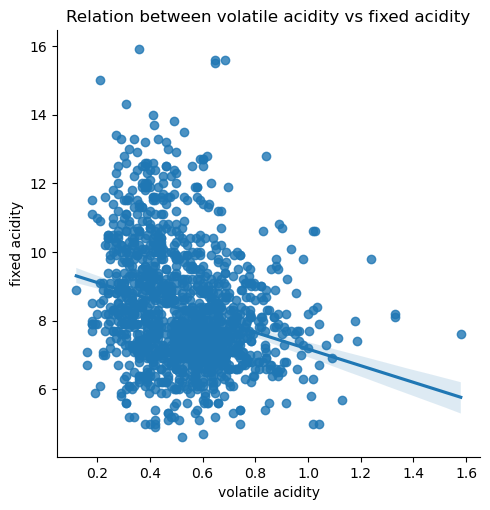

In [28]:
sns.lmplot(x = 'volatile acidity', y='fixed acidity', data=df)
plt.title('Relation between volatile acidity vs fixed acidity')

- By observing the plot, it indicates a clear downward trends in the datapoints between fixed acisity and volatile acidity wheather there is non-linear relationship.

- Depending on the plot we observe there is a negative relationship which means that,volatile acidity increases, fixed acidity tends to decrease.

- the graph shows there are many outliers present.

Text(0.5, 1.0, 'relation between fixed acidity and density')

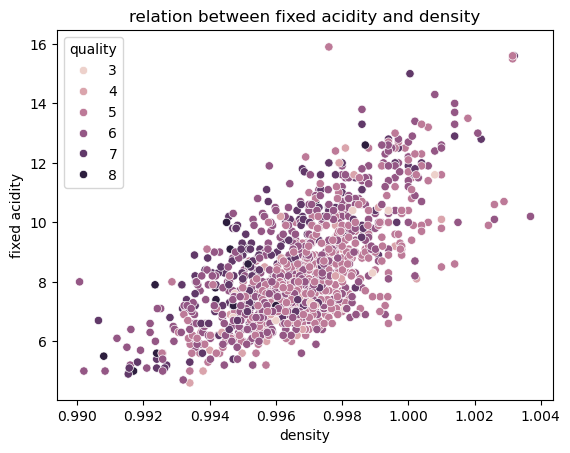

In [29]:
sns.scatterplot(x = 'density', y='fixed acidity', data=df, hue='quality')
plt.title('relation between fixed acidity and density')

- By observing the plot, it shows a strong linear realtion between fixed acidity and density where trends is upward.

- It shows positive relationship between two variables which means the fixed acidity is increased then density also increased.

Text(0.5, 1.0, 'relation between alcohol and density')

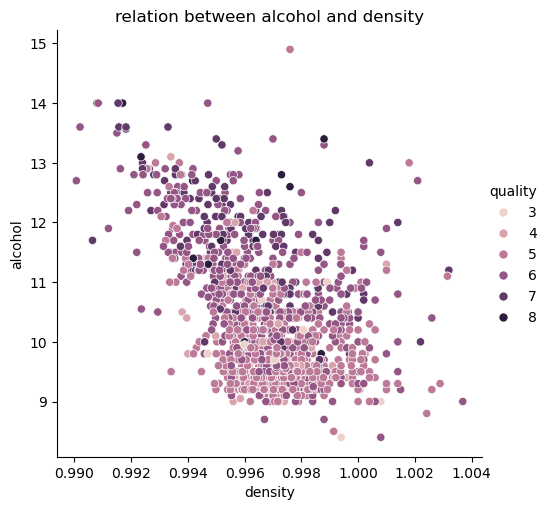

In [30]:
sns.relplot(data= df, x='density', y='alcohol', hue='quality')
plt.title('relation between alcohol and density')

- The plot shows the negative relation between alcohol and density which means alcohol percentage value decreases , density value of wine is increses.

- The trends is downward.

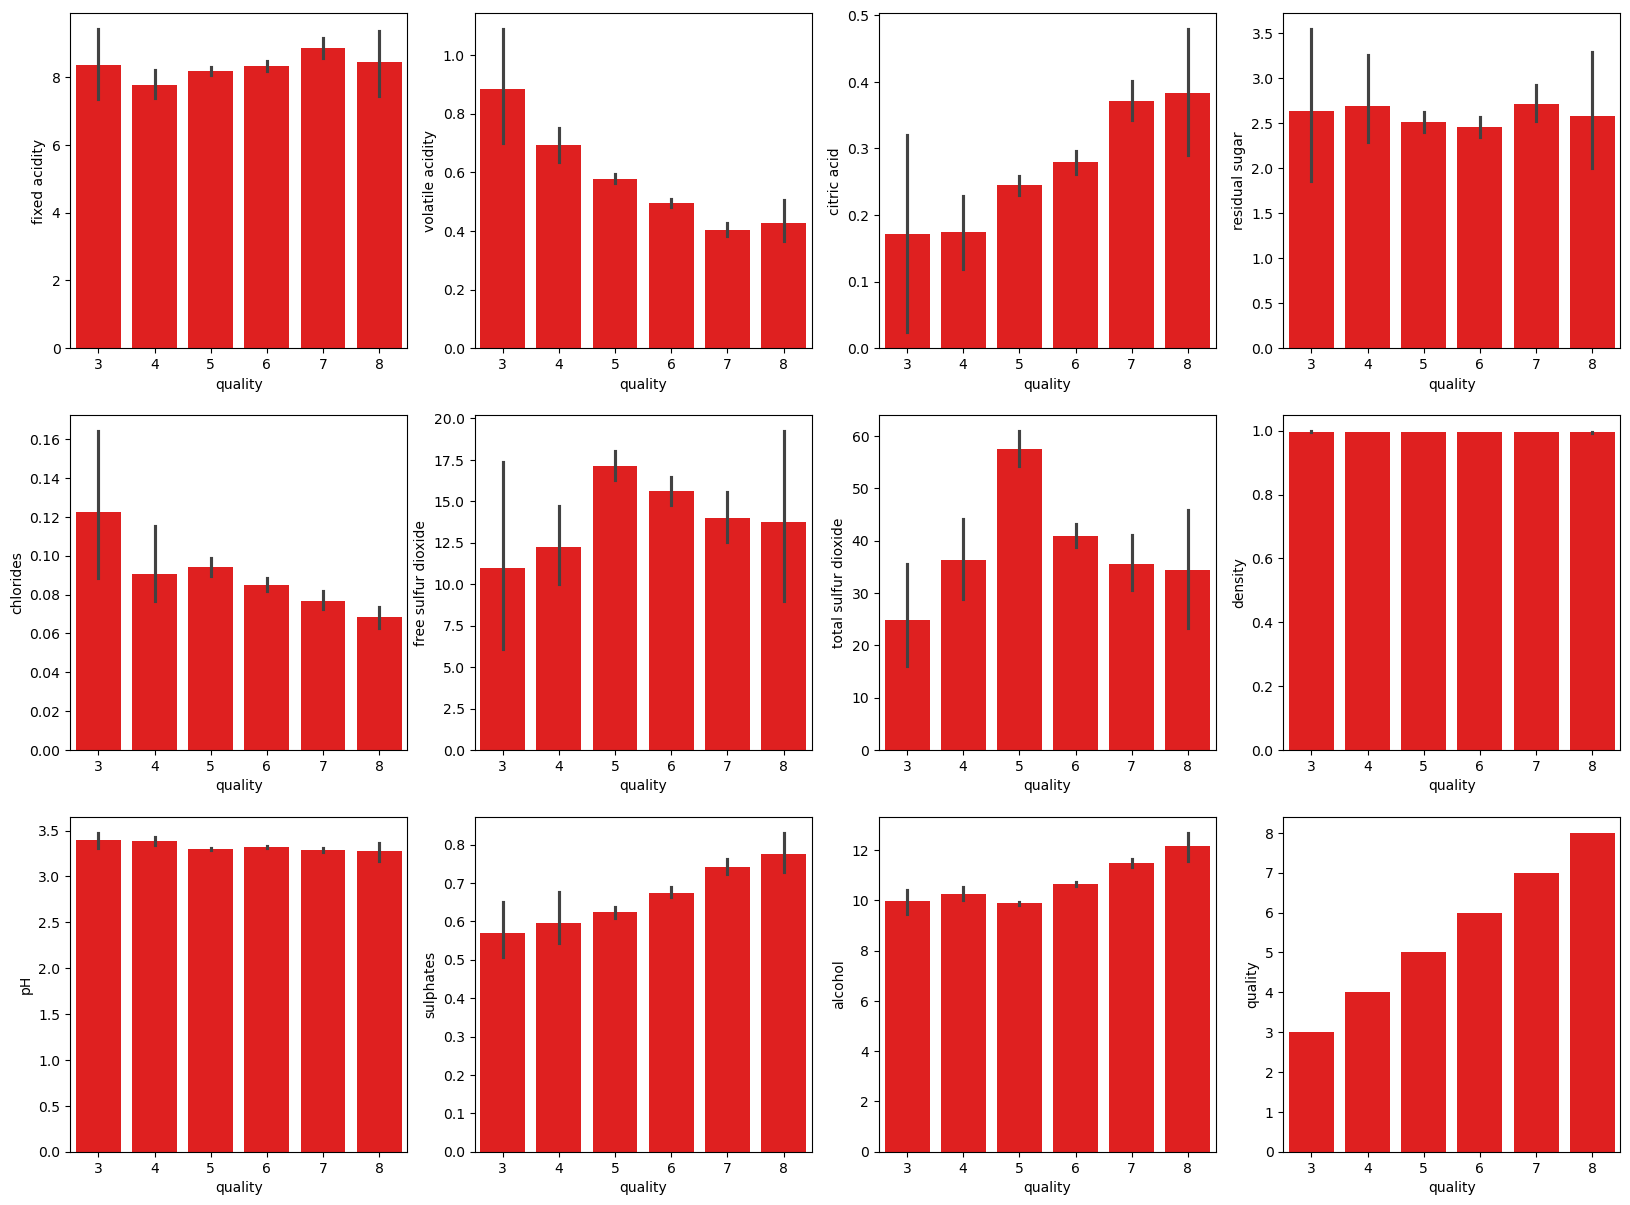

In [31]:
plt.figure(figsize=(20,20))
p = 1
for i in df.columns:
    if p <= 12:
        ax=plt.subplot(4,4,p)
        sns.barplot(x = 'quality', y = i, data=df, color='r')
    p+=1
plt.show()    

By observe the plot, we see that 

- high amount of volatile acidity is not good for better quality wine.

- high amount of salt is not good for better quality of wine.

- high amount of sulphates are good for maintain a better quality of wine.

- In average quality of wine like 5 and 6 have use high amount of sulpher dioxide.

- high amount of citric acid is present in good quality of wine.

Text(0.5, 1.0, 'multivariate analysis')

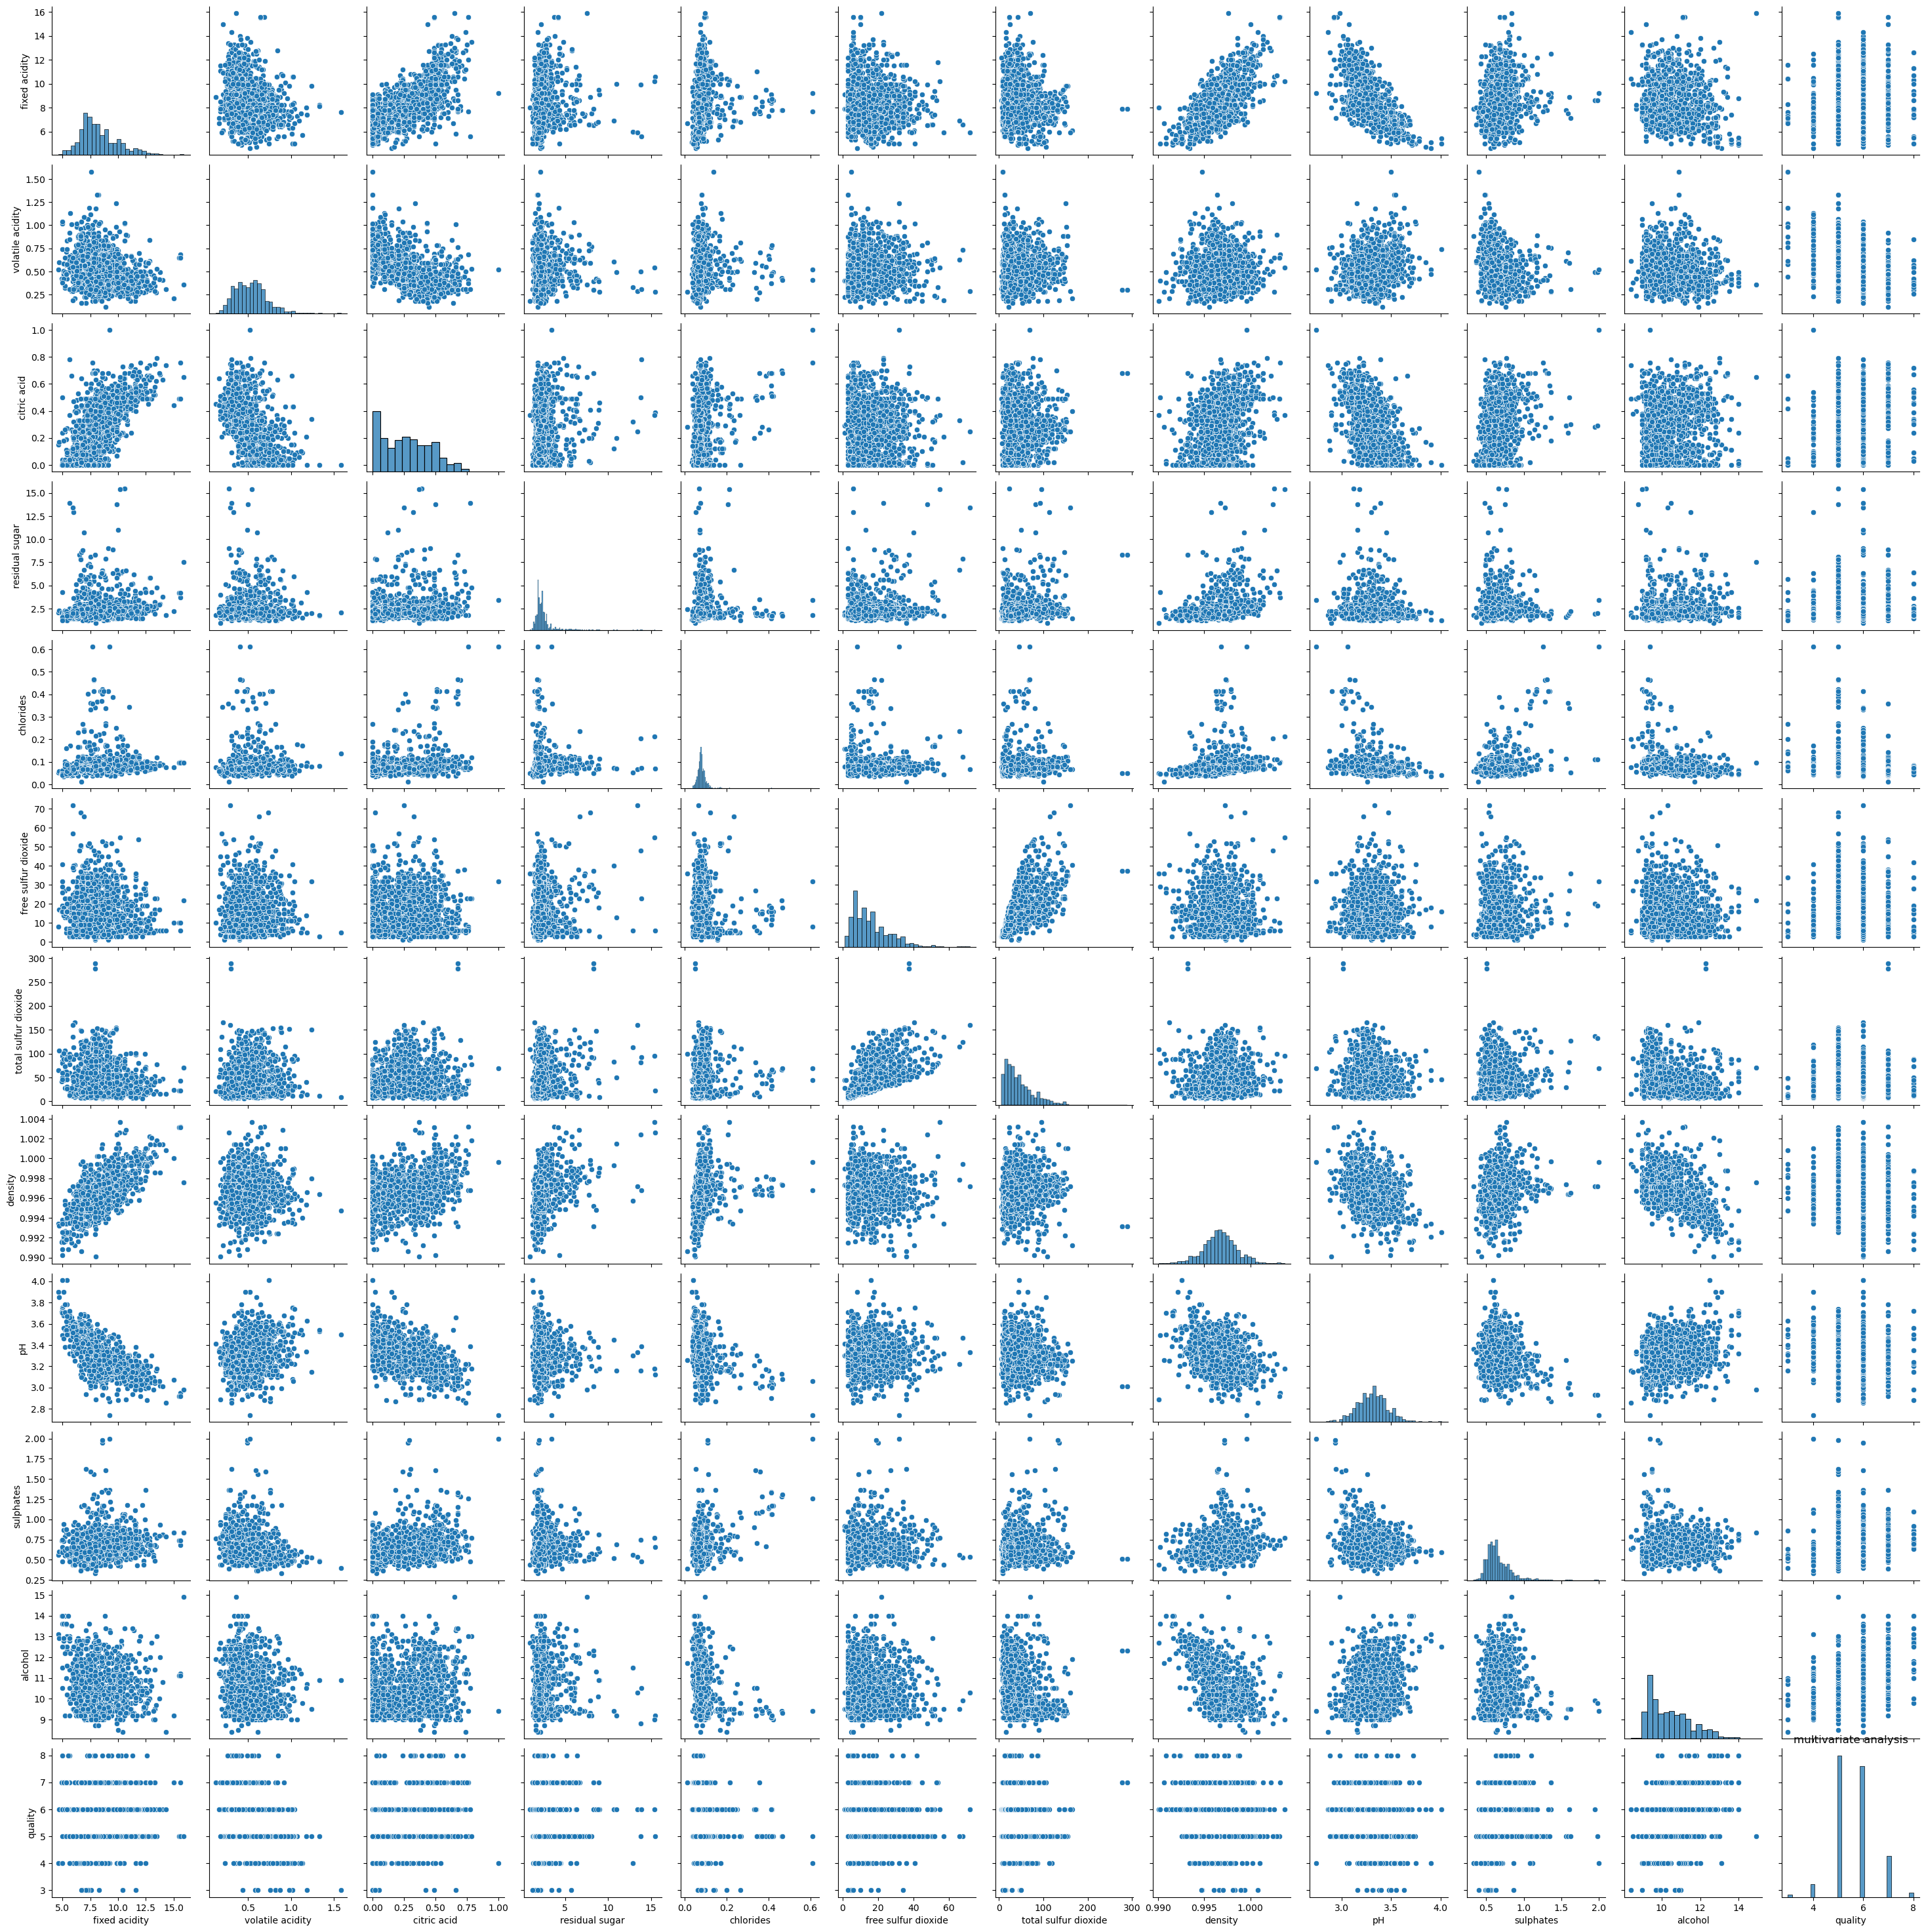

In [32]:
sns.pairplot(df)
plt.title('multivariate analysis')

The plot shows that,

- fixed acidity has a positive linear relationship with citric acid and density.
 
- fixed acidity has a negative relationship with pH.

- density has negative realtionship with alcohol.

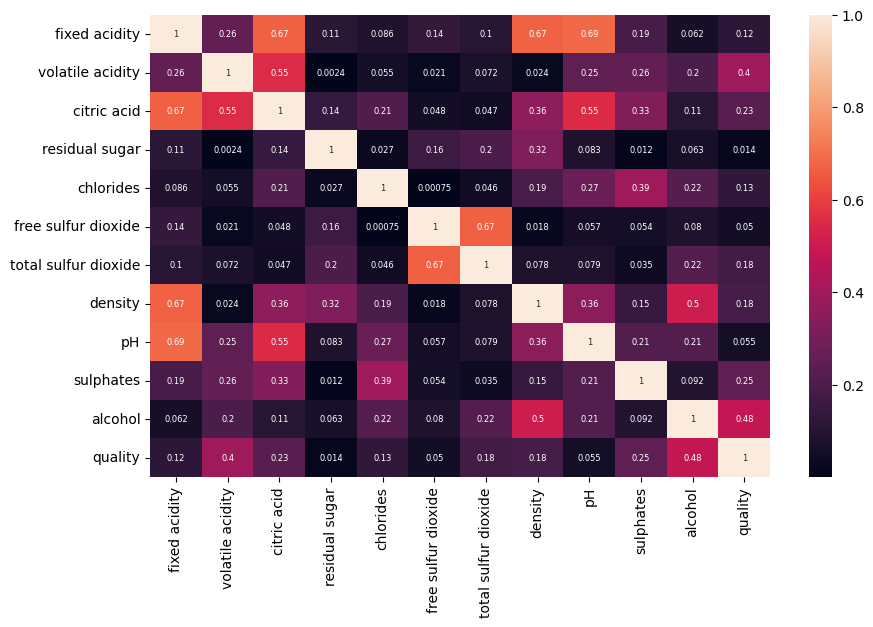

In [33]:
# Check correlation
df_corr = df.corr().abs()

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':6})
plt.show()

In [34]:
df_corr.quality.sort_values()

residual sugar          0.013640
free sulfur dioxide     0.050463
pH                      0.055245
fixed acidity           0.119024
chlorides               0.130988
total sulfur dioxide    0.177855
density                 0.184252
citric acid             0.228057
sulphates               0.248835
volatile acidity        0.395214
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

# check outliers

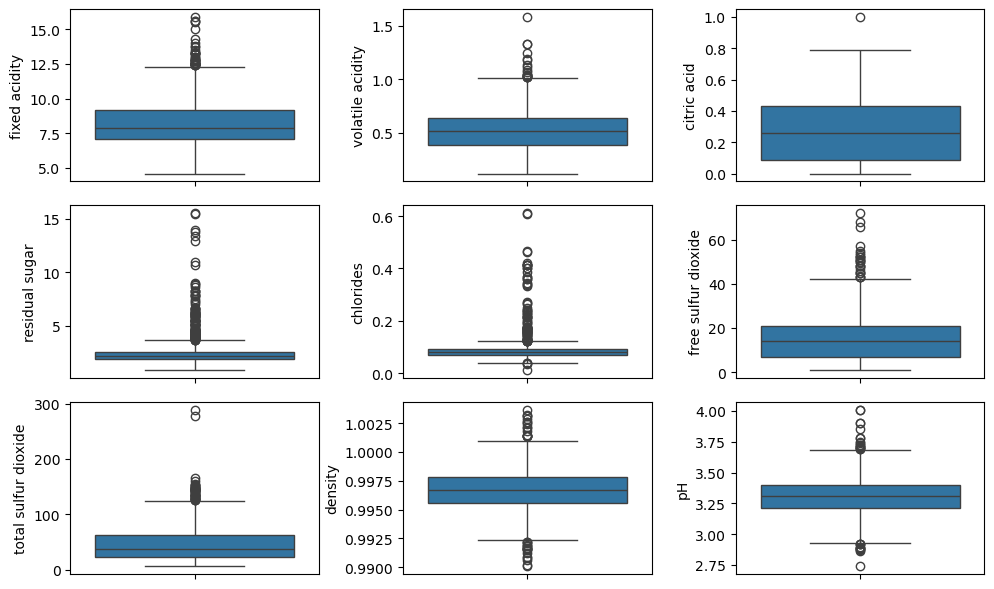

In [35]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col])
    plotnumber+=1
plt.tight_layout()    

In [36]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]))
filtered_entries = (z_scores < 3).all(axis=1)

df1 = df[filtered_entries]
df1.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1239.000000       1239.000000  1239.000000     1239.000000   
mean        8.306295          0.525432     0.266142        2.378692   
std         1.650493          0.173001     0.191153        0.827975   
min         5.000000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        13.500000          1.070000     0.790000        6.550000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1239.000000          1239.000000           1239.000000  1239.000000   
mean      0.081825            15.167877             44.262308     0.996683   
std       0.022701             9.344298             30.019403     0.001717   
min       0.038000             1.000000              6.000000     0.991500   
25%       0.070000             7.000000             21.000000     0.995600   
50%       0.079000            13.000000             37.000000     0.996690   
75%       0.089000            21.000000             59.000000     0.997800   
max       0.236000            47.000000            147.000000     1.002200   

                pH    sulphates      alcohol      quality  
count  1239.000000  1239.000000  1239.000000  1239.000000  
mean      3.313632     0.641994    10.421886     5.631961  
std       0.140892     0.129866     1.038469     0.814932  
min       2.880000     0.330000     8.400000     3.000000  
25%       3.220000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.710000    11.100000     6.000000  
max       3.750000     1.170000    13.600000     8.000000

In [37]:
((df.shape[0]-df1.shape[0])/df.shape[0])*100

8.830022075055188

- Now there are no outliers present after applying z-score except 'chlorides' and 'residual sugar','pH','density' column.We have to proceed with further step.

In [38]:
# if wine quality is 7 or above then mark it as good quality winr

df1['good_quality'] = [1 if x >= 7 else 0 for x in df1['quality']]
df1.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
771             9.4             0.685         0.26             2.4      0.082   
1098            8.0             0.310         0.45             2.1      0.216   
748             7.2             0.500         0.18             2.1      0.071   
826             7.5             0.270         0.34             2.3      0.050   
772             9.5             0.570         0.27             2.3      0.082   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
771                  23.0                 143.0  0.99780  3.28       0.55   
1098                  5.0                  16.0  0.99358  3.15       0.81   
748                  12.0                  31.0  0.99761  3.52       0.72   
826                   4.0                   8.0  0.99510  3.40       0.64   
772                  23.0                 144.0  0.99782  3.27       0.55   

      alcohol  quality  good_quality  
771       9.4        5             0  
1098     12.5        7             1  
748       9.6        6             0  
826      11.0        7             1  
772       9.4        5             0

In [39]:
X = df1.drop(columns=['quality','good_quality'], axis=1)
y = df1.good_quality

# Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [41]:
x_scaled

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.282353          0.610526     0.000000        0.130841   0.191919   
1          0.329412          0.800000     0.000000        0.261682   0.303030   
2          0.329412          0.673684     0.050633        0.205607   0.272727   
3          0.729412          0.168421     0.708861        0.130841   0.186869   
4          0.282353          0.568421     0.000000        0.112150   0.186869   
...             ...               ...          ...             ...        ...   
1234       0.211765          0.526316     0.101266        0.130841   0.151515   
1235       0.141176          0.505263     0.101266        0.149533   0.262626   
1236       0.105882          0.452632     0.126582        0.186916   0.121212   
1237       0.105882          0.552632     0.151899        0.149533   0.186869   
1238       0.117647          0.200000     0.594937        0.448598   0.146465   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.217391              0.198582  0.588785  0.724138   
1                0.521739              0.432624  0.495327  0.367816   
2                0.304348              0.340426  0.514019  0.436782   
3                0.347826              0.382979  0.607477  0.321839   
4                0.260870              0.241135  0.588785  0.724138   
...                   ...                   ...       ...       ...   
1234             0.586957              0.226950  0.468224  0.620690   
1235             0.673913              0.269504  0.317757  0.655172   
1236             0.826087              0.319149  0.338318  0.735632   
1237             0.673913              0.269504  0.371028  0.793103   
1238             0.369565              0.255319  0.372897  0.586207   

      sulphates   alcohol  
0      0.273810  0.192308  
1      0.416667  0.269231  
2      0.380952  0.269231  
3      0.297619  0.269231  
4      0.273810  0.192308  
...         ...       ...  
1234   0.583333  0.211538  
1235   0.297619  0.403846  
1236   0.511905  0.538462  
1237   0.452381  0.346154  
1238   0.392857  0.500000  

[1239 rows x 11 columns]

In [42]:
y.value_counts()

0    1070
1     169
Name: good_quality, dtype: int64

- Data is imbalanced in our dataset that show high count of bad quality of wine and fewer count of good quality of wine.

# Balance the Dataset

In [43]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x_scaled,y)

In [44]:
y1.value_counts()

0    1070
1    1070
Name: good_quality, dtype: int64

# Check skewness

In [45]:
x1.skew()

fixed acidity           0.428354
volatile acidity        0.736308
citric acid            -0.045075
residual sugar          2.259237
chlorides               2.220975
free sulfur dioxide     1.134287
total sulfur dioxide    1.426423
density                 0.008450
pH                      0.168271
sulphates               0.459538
alcohol                 0.281967
dtype: float64

In [46]:
x1['volatile acidity'] = np.sqrt(x1['volatile acidity'])

In [47]:
x1['residual sugar'] = np.cbrt(x1['residual sugar'])

In [48]:
x1['chlorides'] = np.cbrt(x1['chlorides'])

In [49]:
x1['free sulfur dioxide'] = np.cbrt(x1['free sulfur dioxide'])

In [50]:
x1['total sulfur dioxide'] = np.cbrt(x1['total sulfur dioxide'])

In [51]:
x1.skew()

fixed acidity           0.428354
volatile acidity        0.184685
citric acid            -0.045075
residual sugar          0.652743
chlorides              -0.192403
free sulfur dioxide     0.216776
total sulfur dioxide    0.293664
density                 0.008450
pH                      0.168271
sulphates               0.459538
alcohol                 0.281967
dtype: float64

- There is no skewness present in our dataset now.

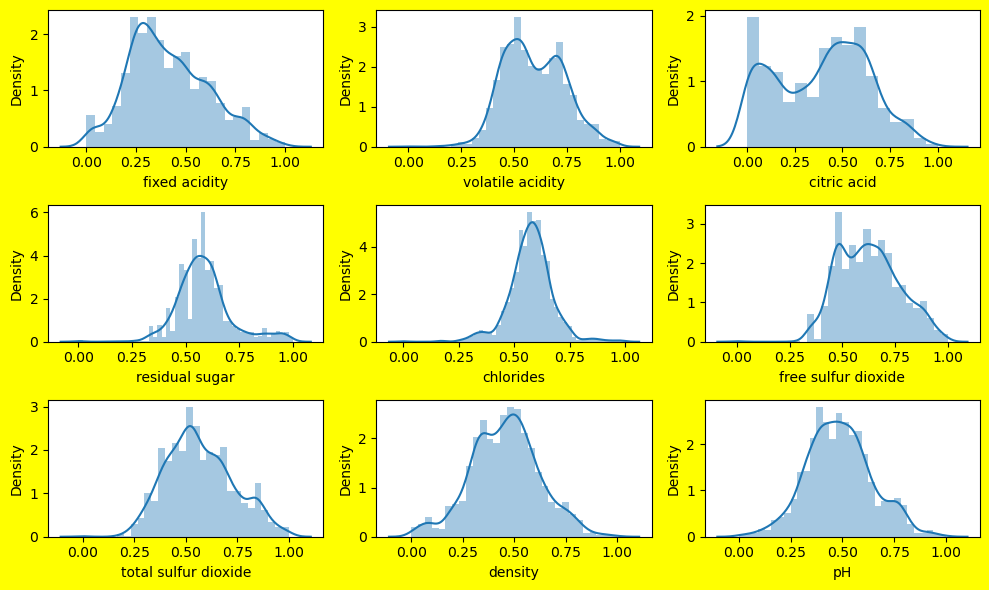

In [52]:
plt.figure(figsize=(10,6), facecolor='yellow')
plotnumber=1
for col in x1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x1[col])
    plotnumber+=1
plt.tight_layout()

- There all columns are almost normally distributed.

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

Feature        VIF
0          fixed acidity  42.272201
1       volatile acidity  33.369619
2            citric acid  13.707755
3         residual sugar  41.893403
4              chlorides  40.043289
5    free sulfur dioxide  49.898290
6   total sulfur dioxide  39.469020
7                density  67.153662
8                     pH  28.171413
9              sulphates  11.915928
10               alcohol  27.007944

In [55]:
x1.drop('density', axis=1, inplace=True)

In [56]:
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

Feature        VIF
0         fixed acidity  19.541387
1      volatile acidity  33.254403
2           citric acid  13.705068
3        residual sugar  27.867780
4             chlorides  39.894936
5   free sulfur dioxide  48.571650
6  total sulfur dioxide  38.723556
7                    pH  21.297329
8             sulphates  11.412485
9               alcohol   9.194470

In [57]:
x1.drop('free sulfur dioxide', axis=1, inplace=True)

In [58]:
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

Feature        VIF
0         fixed acidity  19.264179
1      volatile acidity  33.163372
2           citric acid  13.640096
3        residual sugar  27.778786
4             chlorides  38.693907
5  total sulfur dioxide  14.851028
6                    pH  20.680775
7             sulphates  11.405202
8               alcohol   8.900824

In [59]:
x1.drop('chlorides', axis=1, inplace=True)

In [60]:
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

Feature        VIF
0         fixed acidity  18.332875
1      volatile acidity  27.502161
2           citric acid  13.171204
3        residual sugar  25.216780
4  total sulfur dioxide  14.808535
5                    pH  19.786034
6             sulphates  11.328417
7               alcohol   8.471896

In [61]:
x1.drop('volatile acidity', axis=1, inplace=True)

In [62]:
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

Feature        VIF
0         fixed acidity  13.925016
1           citric acid  10.307860
2        residual sugar  22.741546
3  total sulfur dioxide  12.277702
4                    pH  15.272762
5             sulphates  10.987257
6               alcohol   8.468068

In [63]:
x1.drop('residual sugar', axis=1, inplace=True)

In [64]:
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

Feature        VIF
0         fixed acidity  10.870937
1           citric acid  10.275896
2  total sulfur dioxide  11.359234
3                    pH  11.900516
4             sulphates  10.764720
5               alcohol   7.919024

# Divide the train data and test data

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size= 0.25, random_state= 42)

# Model building

In [66]:
# RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(rfc)

RandomForestClassifier()


In [67]:
def eval_metrics_score(clf, x_train, y_train, actual, pred):
    train_accu_score = accuracy_score(clf.predict(x_train),y_train)*100
    test_accu_score = accuracy_score(actual,pred)*100
    cm = confusion_matrix(actual,pred)
    c_report = classification_report(actual,pred)
    return train_accu_score,test_accu_score,cm,c_report

In [68]:
train_accu_score, test_accu_score, cm, c_report = eval_metrics_score(rfc, x_train, y_train, y_test, rfc_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu_score)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu_score)
print('\n------------------------------------------')
print("Confusion Matrix:\n", cm)
print('\n------------------------------------------')
print("Classification Report:\n", c_report)


------------------------------------------
Training Accuracy Score: 100.0

------------------------------------------
Test Accuracy Score: 92.14953271028037

------------------------------------------
Confusion Matrix:
 [[235  30]
 [ 12 258]]

------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       265
           1       0.90      0.96      0.92       270

    accuracy                           0.92       535
   macro avg       0.92      0.92      0.92       535
weighted avg       0.92      0.92      0.92       535



In [69]:
k_folds = KFold(n_splits=5)
score1 = cross_val_score(rfc,x1,y1,cv=k_folds)
print("Cross Validation Score : {}".format(score1))
print("\n-------------------------------------")
print("Average Cross Validation Score : {}".format(score1.mean()))
print("\n-------------------------------------")
accuracy_score(y_test,rfc_pred) - score1.mean()

Cross Validation Score : [0.87149533 0.85747664 0.78738318 0.93224299 0.9135514 ]

-------------------------------------
Average Cross Validation Score : 0.872429906542056

-------------------------------------


0.0490654205607477

In [70]:
# GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
print(gbc)

GradientBoostingClassifier()


In [71]:
train_accu_score, test_accu_score, cm, c_report = eval_metrics_score(gbc, x_train, y_train, y_test, gbc_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu_score)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu_score)
print('\n------------------------------------------')
print("Confusion Matrix:\n", cm)
print('\n------------------------------------------')
print("Classification Report:\n", c_report)


------------------------------------------
Training Accuracy Score: 92.58566978193147

------------------------------------------
Test Accuracy Score: 88.22429906542057

------------------------------------------
Confusion Matrix:
 [[225  40]
 [ 23 247]]

------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       265
           1       0.86      0.91      0.89       270

    accuracy                           0.88       535
   macro avg       0.88      0.88      0.88       535
weighted avg       0.88      0.88      0.88       535



In [72]:
k_folds = KFold(n_splits=5)
score2 = cross_val_score(gbc,x1,y1,cv=k_folds)
print("Cross Validation Score : {}".format(score2))
print("\n-------------------------------------")
print("Average Cross Validation Score : {}".format(score2.mean()))
print("\n-------------------------------------")
accuracy_score(y_test,gbc_pred) - score2.mean()

Cross Validation Score : [0.82943925 0.8271028  0.74065421 0.87383178 0.89485981]

-------------------------------------
Average Cross Validation Score : 0.833177570093458

-------------------------------------


0.049065420560747586

In [73]:
# ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_test)
print(etc)

ExtraTreesClassifier()


In [74]:
train_accu_score, test_accu_score, cm, c_report = eval_metrics_score(etc, x_train, y_train, y_test, etc_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu_score)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu_score)
print('\n------------------------------------------')
print("Confusion Matrix:\n", cm)
print('\n------------------------------------------')
print("Classification Report:\n", c_report)


------------------------------------------
Training Accuracy Score: 100.0

------------------------------------------
Test Accuracy Score: 92.89719626168224

------------------------------------------
Confusion Matrix:
 [[233  32]
 [  6 264]]

------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       265
           1       0.89      0.98      0.93       270

    accuracy                           0.93       535
   macro avg       0.93      0.93      0.93       535
weighted avg       0.93      0.93      0.93       535



In [75]:
k_folds = KFold(n_splits=5)
score3 = cross_val_score(etc,x1,y1,cv=k_folds)
print("Cross Validation Score : {}".format(score3))
print("\n-------------------------------------")
print("Average Cross Validation Score : {}".format(score3.mean()))
print("\n-------------------------------------")
accuracy_score(y_test,etc_pred) - score3.mean()

Cross Validation Score : [0.87383178 0.86682243 0.82009346 0.93457944 0.93457944]

-------------------------------------
Average Cross Validation Score : 0.8859813084112149

-------------------------------------


0.04299065420560755

In [76]:
# DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
print(dtc)

DecisionTreeClassifier()


In [77]:
train_accu_score, test_accu_score, cm, c_report = eval_metrics_score(dtc, x_train, y_train, y_test, dtc_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu_score)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu_score)
print('\n------------------------------------------')
print("Confusion Matrix:\n", cm)
print('\n------------------------------------------')
print("Classification Report:\n", c_report)


------------------------------------------
Training Accuracy Score: 100.0

------------------------------------------
Test Accuracy Score: 86.35514018691589

------------------------------------------
Confusion Matrix:
 [[221  44]
 [ 29 241]]

------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86       265
           1       0.85      0.89      0.87       270

    accuracy                           0.86       535
   macro avg       0.86      0.86      0.86       535
weighted avg       0.86      0.86      0.86       535



In [78]:
k_folds = KFold(n_splits=5)
score4 = cross_val_score(dtc,x1,y1,cv=k_folds)
print("Cross Validation Score : {}".format(score4))
print("Average Cross Validation Score : {}".format(score4.mean()))
print("\n------------------")
accuracy_score(y_test,dtc_pred) - score4.mean()

Cross Validation Score : [0.85514019 0.78271028 0.80607477 0.8364486  0.89719626]
Average Cross Validation Score : 0.8355140186915888

------------------


0.028037383177570097

In [79]:
# LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(lr)

LogisticRegression()


In [80]:
train_accu_score, test_accu_score, cm, c_report = eval_metrics_score(lr, x_train, y_train, y_test, lr_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu_score)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu_score)
print('\n------------------------------------------')
print("Confusion Matrix:\n", cm)
print('\n------------------------------------------')
print("Classification Report:\n", c_report)


------------------------------------------
Training Accuracy Score: 80.99688473520249

------------------------------------------
Test Accuracy Score: 77.94392523364486

------------------------------------------
Confusion Matrix:
 [[201  64]
 [ 54 216]]

------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       265
           1       0.77      0.80      0.79       270

    accuracy                           0.78       535
   macro avg       0.78      0.78      0.78       535
weighted avg       0.78      0.78      0.78       535



In [81]:
k_folds = KFold(n_splits=5)
score5 = cross_val_score(lr,x1,y1,cv=k_folds)
print("Cross Validation Score : {}".format(score5))
print("Average Cross Validation Score : {}".format(score5.mean()))
print("\n------------------")
accuracy_score(y_test,lr_pred) - score5.mean()

Cross Validation Score : [0.75       0.75233645 0.63084112 0.71495327 0.75      ]
Average Cross Validation Score : 0.719626168224299

------------------


0.059813084112149584

# result

In [82]:
model_res= pd.DataFrame({
    'Model' : ['RandomForest','GradientBoosting','ExtraTress','DecisionTree','Logistic Regression'],
    'Predicted Score' : [accuracy_score(y_test,rfc_pred),
              accuracy_score(y_test,gbc_pred),
              accuracy_score(y_test,etc_pred),
              accuracy_score(y_test,dtc_pred),
              accuracy_score(y_test,lr_pred)],
    'Validation Score' : [score1.mean(),
                               score2.mean(),
                               score3.mean(),
                               score4.mean(),
                               score5.mean()],
    'Difference' : [accuracy_score(y_test,rfc_pred) - score1.mean(),
                   accuracy_score(y_test,gbc_pred) - score2.mean(),
                   accuracy_score(y_test,etc_pred) - score3.mean(),
                   accuracy_score(y_test,dtc_pred) - score4.mean(),
                   accuracy_score(y_test,lr_pred) - score5.mean()]
})

In [83]:
model_res

Model  Predicted Score  Validation Score  Difference
0         RandomForest         0.921495          0.872430    0.049065
1     GradientBoosting         0.882243          0.833178    0.049065
2           ExtraTress         0.928972          0.885981    0.042991
3         DecisionTree         0.863551          0.835514    0.028037
4  Logistic Regression         0.779439          0.719626    0.059813

# - From the difference of both accuracy score and cross validation score we can conclude that "Decision Tree Classifier" is our best fit and best performing model

In [84]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'min_samples_split': [1,2,5],
    'min_samples_leaf': [1,2,3],
    'max_features' : ['sqrt', 'log2']
}

In [85]:
DT = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [86]:
DT.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 5],
                         'splitter': ['best', 'random']})

In [87]:
DT.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [89]:
DT.best_score_*100

86.29283489096574

In [88]:
dt = DecisionTreeClassifier(criterion='gini', max_features='log2', min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('Training Accuracy : {}'.format(accuracy_score(dt.predict(x_train),y_train)*100))
print('\n--------------------------------------------')
print('Testing Accuracy : {}'.format(accuracy_score(y_test,y_pred)*100))
print('\n')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy : 100.0

--------------------------------------------
Testing Accuracy : 85.04672897196261


[[226  39]
 [ 41 229]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       265
           1       0.85      0.85      0.85       270

    accuracy                           0.85       535
   macro avg       0.85      0.85      0.85       535
weighted avg       0.85      0.85      0.85       535



# Compare actual and predicted value

In [90]:
actual = np.array(y_test)

In [91]:
pd.DataFrame({
    'Actual' : actual,
    'Prediction' : y_pred
})

Actual  Prediction
0         1           1
1         1           1
2         1           1
3         1           0
4         0           1
..      ...         ...
530       0           0
531       1           1
532       0           0
533       0           0
534       1           1

[535 rows x 2 columns]

In [92]:
# Save the model
import joblib

joblib.dump(dt,'Red Wine Predictions.pkl')

['Red Wine Predictions.pkl']

# Which physiochemical properties make a good wine

In [93]:
d = DecisionTreeClassifier()
d.fit(x_train,y_train)
d_score = d.feature_importances_
print(d_score)

[0.11674868 0.08575221 0.10917302 0.07968409 0.1818889  0.4267531 ]


In [94]:
features = pd.DataFrame({
    'physiochemical properties' : x1.columns,
    'Importance' : d_score
})
arrange = features.sort_values(by='Importance', ascending=False)
arrange

physiochemical properties  Importance
5                   alcohol    0.426753
4                 sulphates    0.181889
0             fixed acidity    0.116749
2      total sulfur dioxide    0.109173
1               citric acid    0.085752
3                        pH    0.079684

- Alcohol,sulphates and total sulfur dioxide, fixed acidity and citric acid are more important physiochemical properties to make good wine.